# Analyzing the results from the survey of data generators and consumers about the usage and usefulness of the different dataset documentation approaches

Before using add the "survey-results.xlsx" file in the "inputs" folder (see the README for details)

## Import required packages and set plot settings

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0", "#118ab2", "#ef476f", "#fb5607"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]
markers = ["o", "s", "D", "^", "v", "*", "X", "+", "p", "h"]

## Load data

In [3]:
df = pd.read_excel("inputs/dataset/primary/survey-results.xlsx")

## Number of participants

In [4]:
# separte the row with questions
df_questions = df.iloc[0]
df_responses = df.iloc[1:].reset_index(drop=True)

# count
total = len(df_responses)
notcompleted = len(df_responses[df_responses["Q15"].str.contains("Neither")])
completed = total - notcompleted
print("A total of", total, "people participated in the survey.")
print(
    "Of them",
    notcompleted,
    "did not identify as either data generators or consumers so they did not complete the survey.",
)
print(
    "We only analyzed responses from the",
    completed,
    "participants who completed the survey.",
)

# keep only full survey participants
df_responses = df_responses.drop(
    df_responses[df_responses["Q15"].str.contains("Neither")].index
)

A total of 33 people participated in the survey.
Of them 2 did not identify as either data generators or consumers so they did not complete the survey.
We only analyzed responses from the 31 participants who completed the survey.


## Profile of survey participants

In [5]:
roleid = "Q15"
role_options = list(set(list(df_responses[roleid].values)))
role_starts = ["I am a data generator", "I am a data consumer", "I am both"]
role_options_arranged = []
for start in role_starts:
    for option in role_options:
        if option.startswith(start):
            role_options_arranged.append(option)
role_options = role_options_arranged
role_labels = ["Data generator", "Data consumer", "Both"]
row = ["Total", ""]
for i in range(len(role_options)):
    count = len(df_responses[df_responses[roleid] == role_options[i]])
    row.append(count)
    print(role_labels[i], count, round(count / completed * 100, 1))

Data generator 5 16.1
Data consumer 15 48.4
Both 11 35.5


In [6]:
role_labels = ["Data generator", "Data consumer", "Both"]
role_labels = role_labels + ["Total"]
profile_list = []
row = ["Total", ""]
for i in range(len(role_options)):
    count = len(df_responses[df_responses[roleid] == role_options[i]])
    row.append(count)
row.append(len(df_responses))
profile_list.append(row)
questionids = ["Q13", "Q260", "Q39", "Q40"]
question_labels = [
    "Level of education",
    "Affiliation type",
    "Position",
    "Experience at current position",
]

for i in range(len(questionids)):
    options = list(set(list(df_responses[questionids[i]].values)))
    for option in options:
        row = [question_labels[i], option]
        for role in role_options:
            count = len(
                df_responses[
                    (df_responses[questionids[i]] == option)
                    & (df_responses[roleid] == role)
                ]
            )
            row.append(count)
        row.append(len(df_responses[df_responses[questionids[i]] == option]))
        profile_list.append(row)
df_profile = pd.DataFrame(profile_list, columns=["Category", "Option"] + role_labels)
df_profile["Total (%)"] = round(df_profile["Total"] / completed * 100, 1)
display(df_profile)
df_profile.to_excel("outputs/survey_profiles.xlsx", index=False)

,Category,Option,Data generator,Data consumer,Both,Total,Total (%)
0,Total,,5,15,11,31,100.0
1,Level of education,Bachelor’s degree,0,4,0,4,12.9
2,Level of education,"Graduate or professional degree (MA, MS, MBA, ...",4,11,11,26,83.9
3,Level of education,Other (please specify below),1,0,0,1,3.2
4,Affiliation type,Academia,4,13,11,28,90.3
5,Affiliation type,Government,0,1,0,1,3.2
6,Affiliation type,Industry,1,1,0,2,6.5
7,Position,Undergraduate student,1,0,0,1,3.2
8,Position,Graduate student (including professional schoo...,0,4,0,4,12.9
9,Position,Faculty member,1,3,6,10,32.3


## Knowledge and prior-use of dataset documentations

In [7]:
questionids = ["Q44", "Q46"]
doc_options = [
    "Datasheet",
    "Healthsheet",
    "Data card",
    "Data nutrition label",
    "Accountability documentation",
    "None of the above",
]
doc_option_labels = [
    "Datasheet",
    "Healthsheet",
    "Data Card",
    "Data Nutrition Label",
    "Accountability Documentation",
    "None of the above",
]
labels_list = ["Have heard about", "Have prepared/used"]
dict_df = {}
for i in range(len(questionids)):
    full_list = []
    full_list2 = []
    for j in range(len(doc_options)):
        row = [doc_option_labels[j]]
        row2 = [doc_option_labels[j]]
        for role in role_options:
            count = len(
                df_responses[
                    (df_responses[questionids[i]].str.contains(doc_options[j]))
                    & (df_responses[roleid] == role)
                ]
            )
            row.append(count)
            row2.append(count / completed * 100)
        row.append(
            len(df_responses[df_responses[questionids[i]].str.contains(doc_options[j])])
        )
        row2.append(
            len(df_responses[df_responses[questionids[i]].str.contains(doc_options[j])])
            / completed
            * 100
        )
        full_list.append(row)
        full_list2.append(row2)
    df_k = pd.DataFrame(full_list, columns=["Option"] + role_labels)
    df_k2 = pd.DataFrame(full_list2, columns=["Option"] + role_labels)
    dict_df[labels_list[i]] = df_k
    dict_df[labels_list[i] + " %"] = df_k2
    print(labels_list[i])
    display(df_k)

Have heard about


,Option,Data generator,Data consumer,Both,Total
0,Datasheet,5,12,10,27
1,Healthsheet,5,6,7,18
2,Data Card,4,4,5,13
3,Data Nutrition Label,3,3,2,8
4,Accountability Documentation,2,1,3,6
5,None of the above,0,3,2,5


Have prepared/used


,Option,Data generator,Data consumer,Both,Total
0,Datasheet,5,4,8,17
1,Healthsheet,4,0,2,6
2,Data Card,2,2,2,6
3,Data Nutrition Label,1,1,2,4
4,Accountability Documentation,1,0,2,3
5,None of the above,0,10,3,13


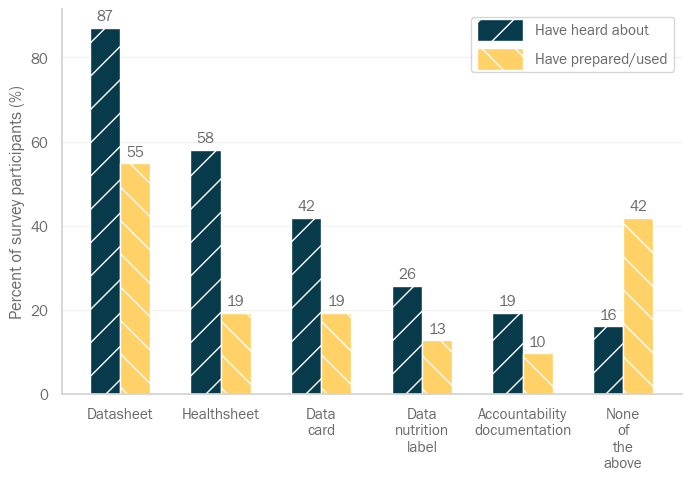

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
width = 0.3
x = np.arange(len(doc_options))
y_list = []
for label in labels_list:
    df_k2 = dict_df[label + " %"]
    y_list.append(list(df_k2["Total"].values))
labels = []
for option in doc_options:
    if len(option.split()) > 1:
        option = "\n".join(option.split())
    labels.append(option)
count = 0
for y in y_list:
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, fmt="%.f", padding=3, fontsize=11)
    count += 1

ax.set_xticks(x + width / 2, labels)
ax.set_ylabel("Percent of survey participants (%)", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(loc="upper right", labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
fig.savefig("outputs/survey_prior_knowledge_use.png", dpi=200)

## Perceived ease of preparing dataset documentations by data generators

#### Asked after review of a randomly assigned dataset documentation template

#### Includes the data generator point of view of those who responsed "both data generators and consumers"

In [9]:
# Question ids
dict_qid = {}

# data generators
dict_qid[role_labels[0]] = {}
dict_qid[role_labels[0]][doc_option_labels[0]] = [
    "Q30#1_1",
    "Q30#1_2",
    "Q30#1_3",
    "Q30#1_4",
    "Q30#1_5",
    "Q30#1_6",
    "Q30#1_7",
    "Q42",
]
dict_qid[role_labels[0]][doc_option_labels[1]] = [
    "Q70#1_1",
    "Q70#1_2",
    "Q70#1_3",
    "Q70#1_4",
    "Q70#1_5",
    "Q70#1_6",
    "Q70#1_7",
    "Q70#1_8",
    "Q70#1_9",
    "Q70#1_10",
    "Q70#1_11",
    "Q70#1_12",
    "Q70#1_13",
    "Q70#1_14",
    "Q71",
]
dict_qid[role_labels[0]][doc_option_labels[2]] = [
    "Q94#1_1",
    "Q94#1_2",
    "Q94#1_3",
    "Q94#1_4",
    "Q94#1_5",
    "Q94#1_6",
    "Q94#1_7",
    "Q94#1_8",
    "Q94#1_9",
    "Q94#1_10",
    "Q94#1_11",
    "Q94#1_12",
    "Q94#1_13",
    "Q94#1_14",
    "Q94#1_15",
    "Q94#1_16",
    "Q95",
]
dict_qid[role_labels[0]][doc_option_labels[3]] = [
    "Q118#1_1",
    "Q118#1_2",
    "Q118#1_3",
    "Q118#1_4",
    "Q118#1_5",
    "Q118#1_6",
    "Q118#1_7",
    "Q119",
]
dict_qid[role_labels[0]][doc_option_labels[4]] = [
    "Q142#1_1",
    "Q142#1_2",
    "Q142#1_3",
    "Q143",
]

# both - with data generators point of view responses
dict_qid[role_labels[2]] = {}
dict_qid[role_labels[2]][doc_option_labels[0]] = [
    "Q186#1_1",
    "Q186#1_2",
    "Q186#1_3",
    "Q186#1_4",
    "Q186#1_5",
    "Q186#1_6",
    "Q186#1_7",
    "Q187",
]
dict_qid[role_labels[2]][doc_option_labels[1]] = [
    "Q199#1_1",
    "Q199#1_2",
    "Q199#1_3",
    "Q199#1_4",
    "Q199#1_5",
    "Q199#1_6",
    "Q199#1_7",
    "Q199#1_8",
    "Q199#1_9",
    "Q199#1_10",
    "Q199#1_11",
    "Q199#1_12",
    "Q199#1_13",
    "Q199#1_14",
    "Q200",
]
dict_qid[role_labels[2]][doc_option_labels[2]] = [
    "Q212#1_1",
    "Q212#1_2",
    "Q212#1_3",
    "Q212#1_4",
    "Q212#1_5",
    "Q212#1_6",
    "Q212#1_7",
    "Q212#1_8",
    "Q212#1_9",
    "Q212#1_10",
    "Q212#1_11",
    "Q212#1_12",
    "Q212#1_13",
    "Q212#1_14",
    "Q212#1_15",
    "Q212#1_16",
    "Q213",
]
dict_qid[role_labels[2]][doc_option_labels[3]] = [
    "Q225#1_1",
    "Q225#1_2",
    "Q225#1_3",
    "Q225#1_4",
    "Q225#1_5",
    "Q225#1_6",
    "Q225#1_7",
    "Q226",
]
dict_qid[role_labels[2]][doc_option_labels[4]] = [
    "Q238#1_1",
    "Q238#1_2",
    "Q238#1_3",
    "Q239",
]

# documentation sections that are evaluated
dict_sections = {}
dict_sections[doc_option_labels[0]] = [
    "Motivation",
    "Composition",
    "Collection Process",
    "Preprocessing/cleaning/labeling",
    "Uses",
    "Distribution",
    "Maintenance",
    "Overall",
]
dict_sections[doc_option_labels[1]] = [
    "General information",
    "Dataset versioning",
    "Motivation",
    "Data Composition",
    "Devices and Contextual Attributes in Data Collection",
    "Challenge tests and confounding factors",
    "Collection and use of demographic information",
    "Pre-processing / de-identification",
    "Labeling and subjectivity of labeling",
    "Collection Process",
    "Accessibility in data collection",
    "Uses",
    "Dataset Distribution",
    "Maintenance",
    "Overall",
]
dict_sections[doc_option_labels[2]] = [
    "Summary",
    "Authorship",
    "Dataset Overview",
    "Example of Data Points",
    "Motivations & Intentions",
    "Access, Retention, & Wipeout",
    "Provenance",
    "Human and Other Sensitive Attributes",
    "Extended Use",
    "Transformations",
    "Annotations & Labeling",
    "Validation Types",
    "Sampling Methods",
    "Known Applications & Benchmarks",
    "Terms of Art",
    "Reflections on Data",
    "Overall",
]
dict_sections[doc_option_labels[3]] = [
    "Metadata",
    "Just the Facts",
    "Collected (Why) – Use Cases",
    "Collected (What)",
    "Collected (How)",
    "Processed (How)",
    "Known Issues",
    "Overall",
]
dict_sections[doc_option_labels[4]] = [
    "Dataset Requirements Specification",
    "Dataset Design Document",
    "Dataset Testing Report",
    "Overall",
]

# Ease evaluation scale
ease_prep_options = ["Very Difficult", "Difficult", "Neutral", "Easy", "Very Easy"]

In [10]:
ease_list = []
for doc in dict_sections.keys():
    i = 0
    for role, qid_list in dict_qid.items():
        for qid, section in zip(qid_list[doc], dict_sections[doc]):
            row = [doc, role, section]
            for option in ease_prep_options:
                count = len(
                    df_responses[
                        (df_responses[qid] == option)
                        & (df_responses[roleid] == role_options[i])
                    ]
                )
                row.append(count)
            ease_list.append(row)
        i = +2
df_ease = pd.DataFrame(
    ease_list, columns=["Documentation approach", "Role", "Section"] + ease_prep_options
)
df_ease["Total"] = df_ease[ease_prep_options].sum(axis=1)

ease_total_list = []
for doc in dict_sections.keys():
    for section in dict_sections[doc]:
        row = [doc, "Combined", section]
        for option in ease_prep_options + ["Total"]:
            count = 0
            for role in dict_qid.keys():
                count += df_ease[
                    (df_ease["Documentation approach"] == doc)
                    & (df_ease["Section"] == section)
                    & (df_ease["Role"] == role)
                ][option].values[0]
            row.append(count)
        ease_total_list.append(row)
df_ease_total = pd.DataFrame(
    ease_total_list,
    columns=["Documentation approach", "Role", "Section"]
    + ease_prep_options
    + ["Total"],
)
df_ease_total.to_excel("outputs/survey_ease_of_prep_evaluation_table.xlsx", index=False)

## Perceived usefulness of a dataset documentations by data consumers

#### Asked after review of a randomly assigned dataset documentation template

#### Includes the data consumers point of view of and those who responsed "both data generators and consumers"

In [11]:
# Question ids
dict_qid = {}

# data consumers
dict_qid[role_labels[1]] = {}
dict_qid[role_labels[1]][doc_option_labels[0]] = [
    "Q56#1_1",
    "Q56#1_2",
    "Q56#1_3",
    "Q56#1_4",
    "Q56#1_5",
    "Q56#1_6",
    "Q56#1_7",
    "Q57",
]
dict_qid[role_labels[1]][doc_option_labels[1]] = [
    "Q82#1_1",
    "Q82#1_2",
    "Q82#1_3",
    "Q82#1_4",
    "Q82#1_5",
    "Q82#1_6",
    "Q82#1_7",
    "Q82#1_8",
    "Q82#1_9",
    "Q82#1_10",
    "Q82#1_11",
    "Q82#1_12",
    "Q82#1_13",
    "Q82#1_14",
    "Q83",
]
dict_qid[role_labels[1]][doc_option_labels[2]] = [
    "Q106#1_1",
    "Q106#1_2",
    "Q106#1_3",
    "Q106#1_4",
    "Q106#1_5",
    "Q106#1_6",
    "Q106#1_7",
    "Q106#1_8",
    "Q106#1_9",
    "Q106#1_10",
    "Q106#1_11",
    "Q106#1_12",
    "Q106#1_13",
    "Q106#1_14",
    "Q106#1_15",
    "Q106#1_16",
    "Q107",
]
dict_qid[role_labels[1]][doc_option_labels[3]] = [
    "Q130#1_1",
    "Q130#1_2",
    "Q130#1_3",
    "Q130#1_4",
    "Q130#1_5",
    "Q130#1_6",
    "Q130#1_7",
    "Q131",
]
dict_qid[role_labels[1]][doc_option_labels[4]] = [
    "Q154#1_1",
    "Q154#1_2",
    "Q154#1_3",
    "Q155",
]

# both - with data generators point of view responses
dict_qid[role_labels[2]] = {}
dict_qid[role_labels[2]][doc_option_labels[0]] = [
    "Q188#1_1",
    "Q188#1_2",
    "Q188#1_3",
    "Q188#1_4",
    "Q188#1_5",
    "Q188#1_6",
    "Q188#1_7",
    "Q189",
]
dict_qid[role_labels[2]][doc_option_labels[1]] = [
    "Q201#1_1",
    "Q201#1_2",
    "Q201#1_3",
    "Q201#1_4",
    "Q201#1_5",
    "Q201#1_6",
    "Q201#1_7",
    "Q201#1_8",
    "Q201#1_9",
    "Q201#1_10",
    "Q201#1_11",
    "Q201#1_12",
    "Q201#1_13",
    "Q201#1_14",
    "Q202",
]
dict_qid[role_labels[2]][doc_option_labels[2]] = [
    "Q214#1_1",
    "Q214#1_2",
    "Q214#1_3",
    "Q214#1_4",
    "Q214#1_5",
    "Q214#1_6",
    "Q214#1_7",
    "Q214#1_8",
    "Q214#1_9",
    "Q214#1_10",
    "Q214#1_11",
    "Q214#1_12",
    "Q214#1_13",
    "Q214#1_14",
    "Q214#1_15",
    "Q214#1_16",
    "Q215",
]
dict_qid[role_labels[2]][doc_option_labels[3]] = [
    "Q227#1_1",
    "Q227#1_2",
    "Q227#1_3",
    "Q227#1_4",
    "Q227#1_5",
    "Q227#1_6",
    "Q227#1_7",
    "Q228",
]
dict_qid[role_labels[2]][doc_option_labels[4]] = [
    "Q240#1_1",
    "Q240#1_2",
    "Q240#1_3",
    "Q241",
]

# Useful evaluation scale
usefulness_options = [
    "Not useful at all",
    "Not useful",
    "Neutral",
    "Useful",
    "Very useful",
]

In [12]:
useful_list = []
for doc in dict_sections.keys():
    i = 1
    for role, qid_list in dict_qid.items():
        for qid, section in zip(qid_list[doc], dict_sections[doc]):
            row = [doc, role, section]
            for option in usefulness_options:
                count = len(
                    df_responses[
                        (df_responses[qid] == option)
                        & (df_responses[roleid] == role_options[i])
                    ]
                )
                row.append(count)
            useful_list.append(row)
        i = +1
df_useful = pd.DataFrame(
    useful_list,
    columns=["Documentation approach", "Role", "Section"] + usefulness_options,
)
df_useful["Total"] = df_useful[usefulness_options].sum(axis=1)

useful_total_list = []
for doc in dict_sections.keys():
    for section in dict_sections[doc]:
        row = [doc, "Combined", section]
        for option in usefulness_options + ["Total"]:
            count = 0
            for role in dict_qid.keys():
                count += df_useful[
                    (df_useful["Documentation approach"] == doc)
                    & (df_useful["Section"] == section)
                    & (df_useful["Role"] == role)
                ][option].values[0]
            row.append(count)
        useful_total_list.append(row)
df_useful_total = pd.DataFrame(
    useful_total_list,
    columns=["Documentation approach", "Role", "Section"]
    + usefulness_options
    + ["Total"],
)
df_useful_total.to_excel("outputs/survey_usefulness_evaluation_table.xlsx", index=False)

## Combined plots ease/useful

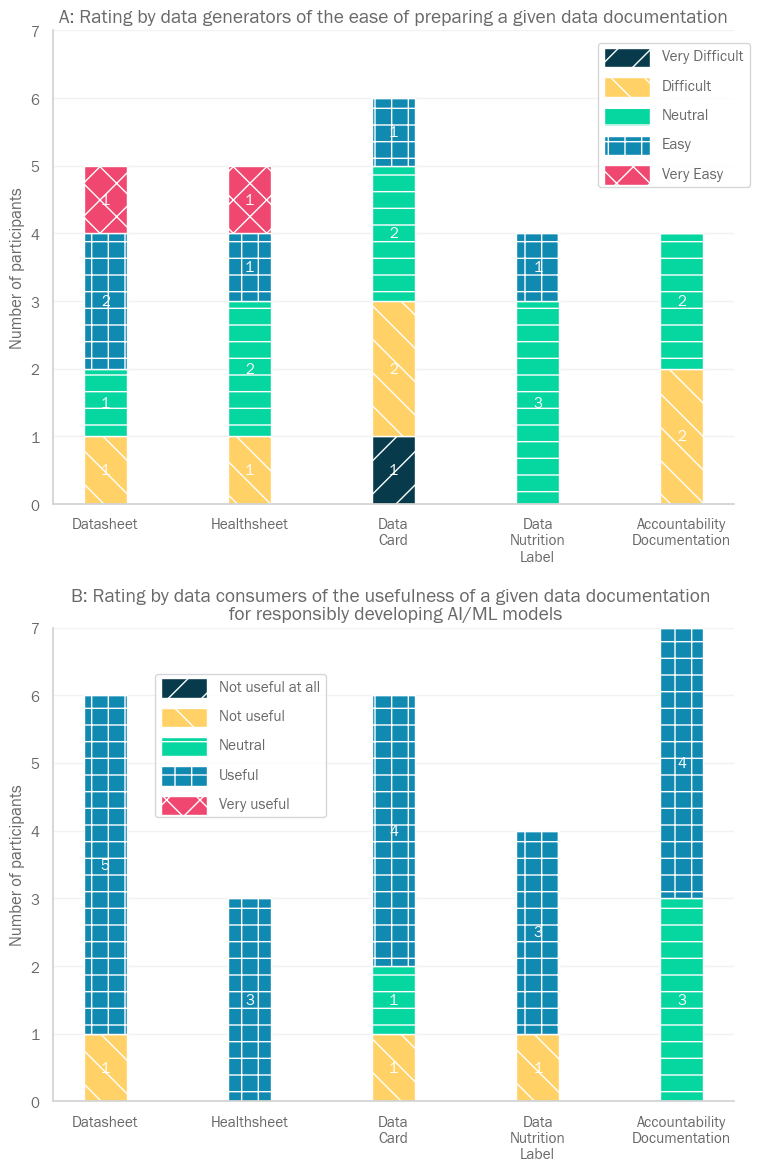

In [13]:
doc_options = dict_sections.keys()
labels = []
for option in doc_options:
    if len(option.split()) > 1:
        option = "\n".join(option.split())
    labels.append(option)

width = 0.3

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
x = np.arange(len(labels))

# ease
df_ease_combined_overall = df_ease_total[
    (df_ease_total["Section"] == "Overall") & (df_ease_total["Role"] == "Combined")
]
ax = axs[0]
bottom = np.zeros(5)
count = 0
for option in ease_prep_options:
    y = df_ease_combined_overall[option]
    ax.bar(
        x,
        y,
        width,
        bottom=bottom,
        color=colors[count],
        hatch=patterns[count],
        label=option,
    )
    count += 1
    bottom = bottom + np.array(y)

for c in ax.containers:
    bar_labels = [int(a) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=bar_labels, label_type="center", fontsize=11, color="white")

ax.set_xticks(x, labels, fontsize=11)
ax.set_yticks(range(8), range(8), fontsize=11)
ax.set_ylabel("Number of participants", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(loc=(0.8, 0.67), labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.set_title(
    "A: Rating by data generators of the ease of preparing a given data documentation",
    fontsize=14,
)

# useful
df_useful_combined_overall = df_useful_total[
    (df_useful_total["Section"] == "Overall") & (df_useful_total["Role"] == "Combined")
]
ax = axs[1]
bottom = np.zeros(5)
count = 0
for option in usefulness_options:
    y = df_useful_combined_overall[option]
    ax.bar(
        x,
        y,
        width,
        bottom=bottom,
        color=colors[count],
        hatch=patterns[count],
        label=option,
    )
    count += 1
    bottom = bottom + np.array(y)

for c in ax.containers:
    bar_labels = [int(a) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=bar_labels, label_type="center", fontsize=11, color="white")

ax.set_xticks(x, labels, fontsize=11)
ax.set_ylabel("Number of participants", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(loc=(0.15, 0.6), labelspacing=1, handlelength=3, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.set_title(
    "B: Rating by data consumers of the usefulness of a given data documentation \n for responsibly developing AI/ML models",
    fontsize=14,
)

fig.tight_layout()
fig.savefig("outputs/survey_ease_useful.png", dpi=200)

## Section specific analysis ease/useful

In [14]:
ease_col = [
    "Rated 'Easy' or 'Very easy' (%)",
    "Not rated 'Easy' or 'Very easy' (%)",
    "Rated 'Difficult' or 'Very Difficult' (%)",
]
df_ease_total[ease_col[0]] = (
    (df_ease_total["Easy"] + df_ease_total["Very Easy"]) / df_ease_total["Total"] * 100
)
df_ease_total[ease_col[1]] = (
    (
        df_ease_total["Difficult"]
        + df_ease_total["Very Difficult"]
        + df_ease_total["Neutral"]
    )
    / df_ease_total["Total"]
    * 100
)
df_ease_total[ease_col[2]] = (
    (df_ease_total["Difficult"] + df_ease_total["Very Difficult"])
    / df_ease_total["Total"]
    * 100
)
df_ease_total["Neutral (%)"] = df_ease_total["Neutral"] / df_ease_total["Total"] * 100

In [15]:
useful_col = [
    "Rated 'Useful' or 'Very useful' (%)",
    "Not rated 'Useful' or 'Very useful' (%)",
    "Rated 'Not useful' or 'Not useful at all' (%)",
]
df_useful_total[useful_col[0]] = (
    (df_useful_total["Useful"] + df_useful_total["Very useful"])
    / df_useful_total["Total"]
    * 100
)
df_useful_total[useful_col[1]] = (
    (
        df_useful_total["Not useful"]
        + df_useful_total["Not useful at all"]
        + df_useful_total["Neutral"]
    )
    / df_useful_total["Total"]
    * 100
)
df_useful_total[useful_col[2]] = (
    (df_useful_total["Not useful"] + df_useful_total["Not useful at all"])
    / df_useful_total["Total"]
    * 100
)
df_useful_total["Neutral (%)"] = (
    df_useful_total["Neutral"] / df_useful_total["Total"] * 100
)

In [16]:
treshold = [50, 50.001, 50.001]

rows_list = []
for doc in doc_options:
    df_doc = df_ease_total[df_ease_total["Documentation approach"] == doc]
    my_row = [doc]
    for count_col, column in enumerate(ease_col):
        sections = ""
        count_sect = 0
        for index, row in df_doc[df_doc[column] >= treshold[count_col]].iterrows():
            if row["Section"] != "Overall":
                if len(row["Section"]) > 0:
                    if count_sect > 0:
                        sections += ", "
                    sections += row["Section"] + " (" + str(round(row[column])) + "%)"
                    count_sect += 1
        my_row.append(sections)
    rows_list.append(my_row)
df_ease_sections_rating = pd.DataFrame(
    rows_list,
    columns=["Documentation Approach"]
    + [
        "Rated 'Easy' or 'Very easy' by 50% or more",
        "Not rated 'Easy' or 'Very easy' by more than 50%",
        "Rated 'Difficult' or 'Very Difficult' by more than 50%",
    ],
)
df_ease_sections_rating.to_excel("outputs/survey_ease_rating.xlsx", index=False)

rows_list = []
for doc in doc_options:
    df_doc = df_useful_total[df_useful_total["Documentation approach"] == doc]
    my_row = [doc]
    for count_col, column in enumerate(useful_col):
        sections = ""
        count_sect = 0
        for index, row in df_doc[df_doc[column] >= treshold[count_col]].iterrows():
            if row["Section"] != "Overall":
                if len(row["Section"]) > 0:
                    if count_sect > 0:
                        sections += ", "
                    sections += row["Section"] + " (" + str(round(row[column])) + "%)"
                    count_sect += 1
        my_row.append(sections)
    rows_list.append(my_row)

df_useful_sections_rating = pd.DataFrame(
    rows_list,
    columns=["Documentation Approach"]
    + [
        "Rated 'Useful' or 'Very useful' by 50% or more",
        "Not rated 'Useful' or 'Very useful' by more than 50%",
        "Rated 'Not useful' or 'Not useful at all' by more than 50%",
    ],
)
df_useful_sections_rating.to_excel("outputs/survey_useful_rating.xlsx", index=False)

In [17]:
df_ease_sections_rating

,Documentation Approach,Rated 'Easy' or 'Very easy' by 50% or more,Not rated 'Easy' or 'Very easy' by more than 50%,Rated 'Difficult' or 'Very Difficult' by more than 50%
0,Datasheet,"Motivation (80%), Composition (80%), Collectio...",,
1,Healthsheet,"General information (80%), Dataset versioning ...","Challenge tests and confounding factors (80%),...",
2,Data Card,"Summary (83%), Authorship (83%), Dataset Overv...","Access, Retention, & Wipeout (83%), Provenance...",
3,Data Nutrition Label,"Metadata (50%), Just the Facts (50%), Collecte...",,
4,Accountability Documentation,Dataset Requirements Specification (50%),"Dataset Design Document (100%), Dataset Testin...",


In [18]:
df_useful_sections_rating

,Documentation Approach,Rated 'Useful' or 'Very useful' by 50% or more,Not rated 'Useful' or 'Very useful' by more than 50%,Rated 'Not useful' or 'Not useful at all' by more than 50%
0,Datasheet,"Composition (83%), Collection Process (83%), P...",Motivation (67%),
1,Healthsheet,"Dataset versioning (67%), Data Composition (10...","General information (67%), Motivation (100%)",
2,Data Card,"Summary (83%), Authorship (50%), Dataset Overv...","Motivations & Intentions (67%), Terms of Art (...",
3,Data Nutrition Label,"Metadata (75%), Just the Facts (75%), Collecte...",,
4,Accountability Documentation,Dataset Requirements Specification (57%),"Dataset Design Document (57%), Dataset Testing...",
